In [29]:
from typing import List, Tuple
import matplotlib.pyplot as plt
import math
import tqdm
import random

In [30]:
tuples = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = [list(row) for row in tuples]

xs = [[1.0] + row[:2] for row in data]  # [1, experience, salary]
ys = [row[2] for row in data]           # paid_account

In [31]:
Vector = List[float]

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """Calcula la media y la desviación estándar de cada columna"""
    num_cols = len(data[0])
    
    # Calculamos la media por cada columna
    means = [sum(row[i] for row in data) / len(data) 
             for i in range(num_cols)]
    
    stdevs = []
    for i in range(num_cols):
        column = [row[i] for row in data]
        mean = means[i]
        # Varianza y luego Desviación Estándar
        variance = sum((x - mean) ** 2 for x in column) / len(data)
        stdevs.append(math.sqrt(variance))
        
    return means, stdevs

def rescale(data: List[Vector]) -> List[Vector]:
    """
    Reescala los datos de entrada para que cada columna tenga 
    media 0 y desviación estándar 1 (exceptuando el término constante)
    """
    means, stdevs = scale(data)
    
    rescaled = []
    for row in data:
        # La primera columna suele ser el 1.0 del intercepto, no la reescalamos
        rescaled_row = [row[0]] 
        for i in range(1, len(row)):
            if stdevs[i] > 0:
                rescaled_row.append((row[i] - means[i]) / stdevs[i])
            else:
                rescaled_row.append(row[i])
        rescaled.append(rescaled_row)
        
    return rescaled

def least_squares_fit(xs: List[Vector], 
                      ys: List[float], 
                      learning_rate: float, 
                      num_epochs: int, 
                      batch_size: int) -> Vector:
    """
    Encuentra la beta que minimiza el error al cuadrado.
    """
    # Empezamos con un guess aleatorio
    guess = [random.random() for _ in xs[0]]

    for _ in tqdm.trange(num_epochs, desc="Ajuste de Mínimos Cuadrados"):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]

            # Calculamos el gradiente promedio del batch
            # Asegúrate de tener definidido 'sqerror_gradient'
            gradient = vector_mean([sqerror_gradient(x, y, guess) 
                                    for x, y in zip(batch_xs, batch_ys)])

            # Actualizamos guess en la dirección opuesta al gradiente
            guess = gradient_step(guess, gradient, -learning_rate)

    return guess

def vector_mean(vectors: List[Vector]) -> Vector:
    """Calcula el promedio elemento a elemento de una lista de vectores."""
    n = len(vectors)
    num_elements = len(vectors[0])
    return [sum(vector[i] for vector in vectors) / n 
            for i in range(num_elements)]

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Se mueve 'step_size' en la dirección del gradiente desde 'v'."""
    return [v_i + step_size * g_i for v_i, g_i in zip(v, gradient)]

def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    """
    Calcula el gradiente del error al cuadrado para un solo punto.
    La derivada de (dot(x, beta) - y)^2 es 2 * (dot(x, beta) - y) * x_i
    """
    # Usamos la función predict que definimos antes
    err = predict(x, beta) - y 
    return [2 * err * x_i for x_i in x]
def dot(v: Vector, w: Vector) -> float:
    """Computa v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "Los vectores deben tener la misma longitud"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def predict(x: Vector, beta: Vector) -> float:
    """Asume que el primer elemento de x es 1 (el intercepto)"""
    return dot(x, beta)

def vector_sum(vectors: List[Vector]) -> Vector:
    """Suma todos los vectores elemento a elemento"""
    # Verificamos que la lista no esté vacía
    if not vectors: return []
    
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "Todos los vectores deben tener la misma longitud"
    
    return [sum(v[i] for v in vectors) 
            for i in range(num_elements)]

def y_logistic(x: Vector, beta: Vector) -> float:
    """
    Calcula la probabilidad de que y=1 para el vector de entrada x.
    Equivale a la función sigmoide aplicada al producto punto.
    """
    return logistic(dot(x, beta))

Ajuste de Mínimos Cuadrados: 100%|██████████| 1000/1000 [00:00<00:00, 1473.42it/s]


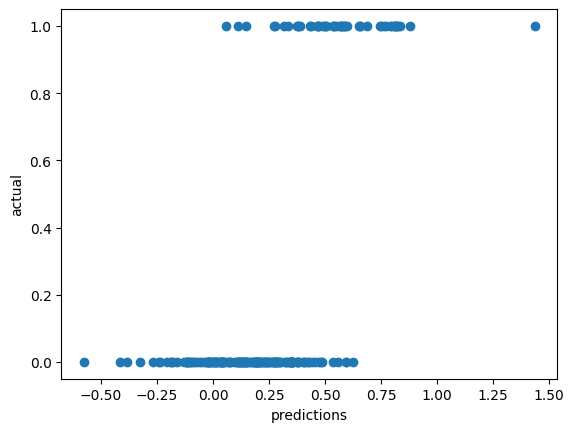

In [32]:
learning_rate = 0.001
rescaled_xs = rescale(xs)
beta = least_squares_fit(rescaled_xs, ys, learning_rate, 1000, 1)
# [0.26, 0.43, -0.43]
predictions = [predict(x_i, beta) for x_i in rescaled_xs]
plt.scatter(predictions, ys)
plt.xlabel("predictions")
plt.ylabel("actual")
plt.show()

In [33]:
def logistic(x: float) -> float:
    return 1.0 / (1 + math.exp(-x))

In [34]:
def logistic_prime(x: float) -> float:
    y = logistic(x)
    return y * (1 -y)

In [35]:
def _negative_log_likelihood(x: Vector, y: float, beta: Vector) -> float:
    """Calcula el negativo del logaritmo de la función de verosimilitud"""
    if y == 1:
        return -math.log(logistic(dot(x, beta)))
    else:
        return -math.log(1 - logistic(dot(x, beta)))

In [36]:
def negative_log_likelihood(xs: List[Vector], ys: List[float], beta: Vector) -> float:
    return sum(_negative_log_likelihood(x, y, beta) for x, y in zip(xs, ys))

In [37]:
def _negative_log_partial_j(x: Vector, y: float, beta: Vector, j: int) -> float:
    """Calcula la derivada parcial del negativo del logaritmo de la función de verosimilitud con respecto a beta_j"""
    return -(y_logistic(dot(x, beta))  * x[j])

def _negative_log_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    return [_negative_log_partial_j(x, y, beta, j) for j in range(len(beta))]

def negative_log_gradient(xs: List[Vector], ys: List[float], beta: Vector) -> Vector:
    return vector_sum([_negative_log_gradient(x, y, beta) for x, y in zip(xs, ys)])